<a href="https://colab.research.google.com/github/BugraKaytanli/Prediction-of-Finger-Flexion-from-ECoG/blob/main/ECoG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd


In [2]:
tgs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ECoG_dataset/tgs.csv', header=None, delimiter=",")
trs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ECoG_dataset/trs.csv', header=None, delimiter=",")
# Discover, visualize, and preprocess data using pandas if needed.
tgs = tgs.to_numpy()
trs = trs.to_numpy()

# tgs = open("/content/sample_data/tgs.csv")
# tgs = np.loadtxt(tgs, delimiter=",")
# trs = open("/content/sample_data/trs.csv")
# trs = np.loadtxt(trs, delimiter=",")
t_end=tgs.shape
t= range(1,t_end[0])
print(trs.shape)
print(tgs.shape)


(400000, 64)
(400000, 5)


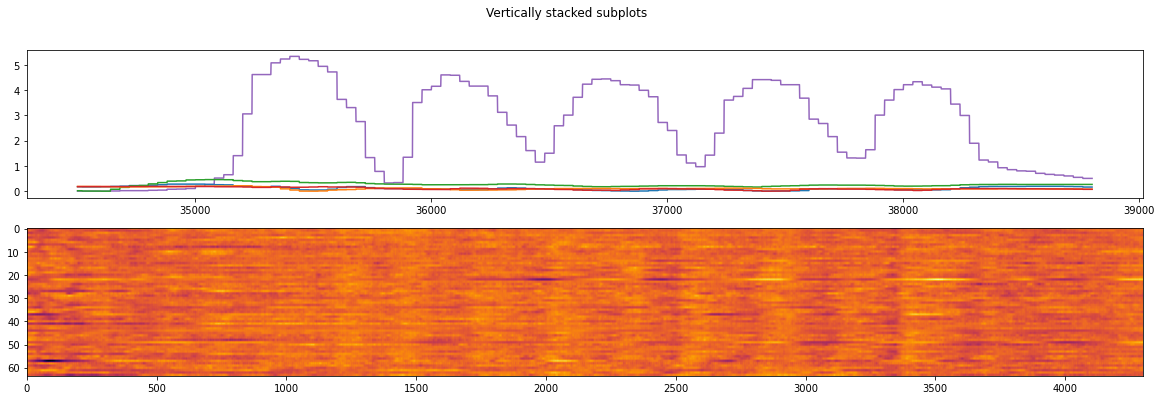

In [4]:
#plt.plot(tgs[0:12000,0])

fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')


startplot=34500; endplot=38800; incrementplot=1;
tg=tgs[startplot:endplot:incrementplot,:]
tgm=tg-np.amin(tg,axis=0)

tr=trs[startplot:endplot:incrementplot,:]
tt=t[startplot:endplot:incrementplot]

axs[0].plot(tt,tgm[:,0],'tab:purple')
axs[0].plot(tt,tgm[:,1],'tab:blue')
axs[0].plot(tt,tgm[:,2],'tab:green')
axs[0].plot(tt,tgm[:,3],'tab:orange')
axs[0].plot(tt,tgm[:,4],'tab:red')

axs[1].imshow(tr.transpose(),cmap="inferno",aspect='auto',interpolation=None)
plt.rcParams["figure.figsize"] = (20,6)
plt.colorbar
plt.show()
plt.rcParams["figure.figsize"] = (20,6)

(4300,)


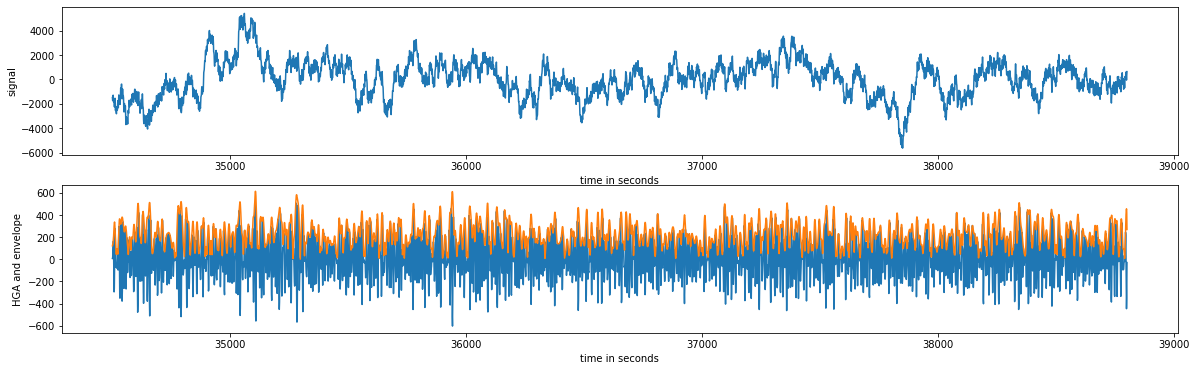

In [5]:
from scipy.signal import hilbert, butter, filtfilt

sampling_rate = 1000.0
nyq=sampling_rate*0.5

b, a = scipy.signal.iirnotch(60, 10, sampling_rate)
y = filtfilt(b, a, tr[:,0])

passband = [70/nyq, 190/nyq]
b, a = butter(5, passband, 'bandpass')
y = filtfilt(b, a, y)
analytic_signal = hilbert(y)
amplitude_envelope = np.abs(analytic_signal)

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(tt, tr[:,0], label='signal')
ax0.set_xlabel("time in seconds")
ax0.set_ylabel("signal")

# ax1.plot(tt, tr[:,0], label='signal')
ax1.plot(tt, y, label='hilbert')
ax1.plot(tt, amplitude_envelope, label='envelope')
ax1.set_xlabel("time in seconds")
ax1.set_ylabel("HGA and envelope")

print(analytic_signal.shape)

In [6]:
y=tr
for i in [1,2,3,4]:
  b, a = scipy.signal.iirnotch(60*i, 30, sampling_rate)
  y = filtfilt(b, a, y, axis=0)

passband = [70/nyq, 190/nyq]
b, a = butter(5, passband, 'bandpass')
y = filtfilt(b, a, y)
analytic_signal = hilbert(y)
amplitude_envelope = np.abs(analytic_signal)

In [7]:
# print(amplitude_envelope.shape[1])
corr=np.zeros((amplitude_envelope.shape[0]*2-1,amplitude_envelope.shape[1]))

print(corr.shape)
for i in range(0, 63):
  corr[:,i] = scipy.signal.correlate(amplitude_envelope[:,i],tgm[:,0])

amplitude_envelope_sorted=amplitude_envelope[:,np.argsort(corr.sum(axis=0))[::-1]]

# lags = scipy.signal.correlation_lags(len(tgm[:,0]), len(tgm[:,0]))
# print (corr.shape)
# print (tgm.shape)
# plt.plot(corr)
# x = np.array([[1,2,3,4]])
# print(np.tile(tgm[:,0],(1,amplitude_envelope.shape[1])).shape)

# c = np.array([1,2,3,4])
# np.tile(c,(1,4))
# print(c.shape)
# print(np.transpose(np.tile(tgm[:,0],(amplitude_envelope.shape[1],1))).shape)
# print(amplitude_envelope.shape)


# plt.plot(corr)
# column_sums = corr.sum(axis=0)
# indices=np.argsort(column_sums)
#indices=np.argsort(np.argsort(column_sums))

# column_sums  = np.array([9,8,7,1,2,3,0,5])
# indices=np.argsort(column_sums)

# print(column_sums)
# print(indices)

# plt.plot(indices,column_sums,'o')
# plt.plot(column_sums,'o')
# plt.plot(column_sums[indices])



(8599, 64)


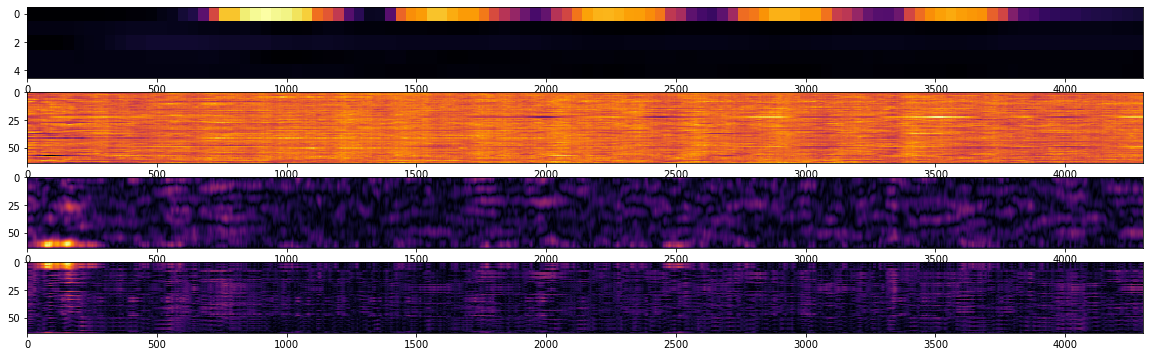

In [8]:
plt.subplot(411)
plt.rcParams["figure.figsize"] = (20,6)
plt.rcParams["image.interpolation"] = None
plt.imshow(tgm.transpose(),cmap="inferno",aspect='auto',interpolation=None)
plt.subplot(412)
plt.imshow(tr.transpose(),cmap="inferno",aspect='auto',interpolation=None)
plt.rcParams["figure.figsize"] = (20,6)
plt.rcParams["image.interpolation"] = None
plt.subplot(413)
plt.imshow(amplitude_envelope.transpose(),cmap="inferno",aspect='auto',interpolation=None)
plt.rcParams["figure.figsize"] = (20,6)
plt.rcParams["image.interpolation"] = None
plt.subplot(414)
plt.imshow(amplitude_envelope_sorted[:,::].transpose(),cmap="inferno",aspect='auto',interpolation=None)
plt.rcParams["figure.figsize"] = (20,6)
plt.rcParams["image.interpolation"] = None


# plt.show()
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(cax=cax)

/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


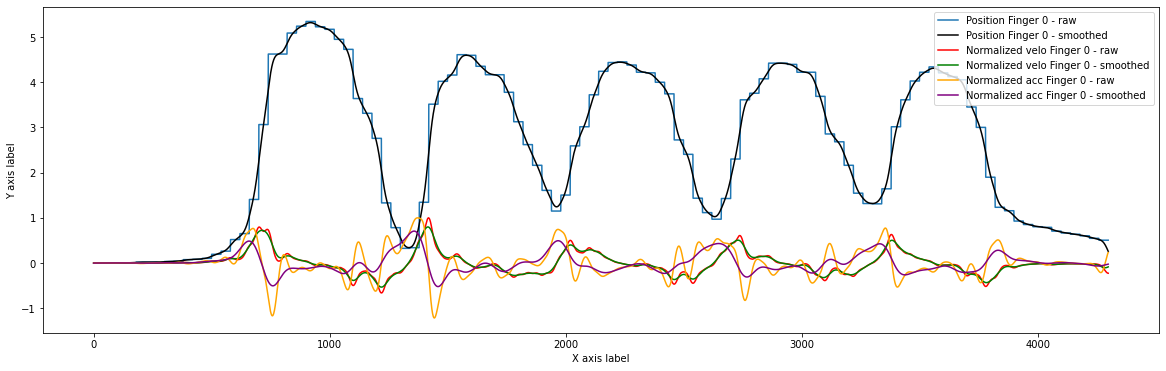

4300 4300 4300


In [198]:
# Create position and velocity trajectories of the fingers
# from scipy.signal import savgol_filter
# tgm_sm=savgol_filter(tgm[:,0], 151, 3)

filter_size_pts=101
y=tgm[:,0]
def smooth(y, box_pts,filter_type):
    box = np.ones(box_pts)/box_pts
    gauss = cv2.getGaussianKernel(box_pts, box_pts/6)
    gauss=gauss.squeeze() # this is to go from xby1 array to xby0 array to make convolutional filtering work.
    y_smooth = np.convolve(y, eval(filter_type), mode='same')
    return y_smooth

fig = plt.figure
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(y)
tgm_sm=smooth(y,filter_size_pts,'gauss')
plt.plot(tgm_sm,color='black')

dydx = np.gradient(tgm_sm)
v_tgm_sm=smooth(dydx,filter_size_pts,'gauss')

ddyddx = np.gradient(v_tgm_sm)
a_tgm_sm=smooth(ddyddx,filter_size_pts+100,'gauss')


plt.plot(dydx/max(dydx),color='red')
plt.plot(v_tgm_sm/max(dydx),color='green')
plt.plot(ddyddx/max(ddyddx),color='orange')
plt.plot(a_tgm_sm/max(ddyddx),color='purple')

plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.legend(['Position Finger 0 - raw', 'Position Finger 0 - smoothed','Normalized velo Finger 0 - raw', 'Normalized velo Finger 0 - smoothed','Normalized acc Finger 0 - raw', 'Normalized acc Finger 0 - smoothed'],loc='upper right')
plt.show()
print(y.size, tgm_sm.size, v_tgm_sm.size)

/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


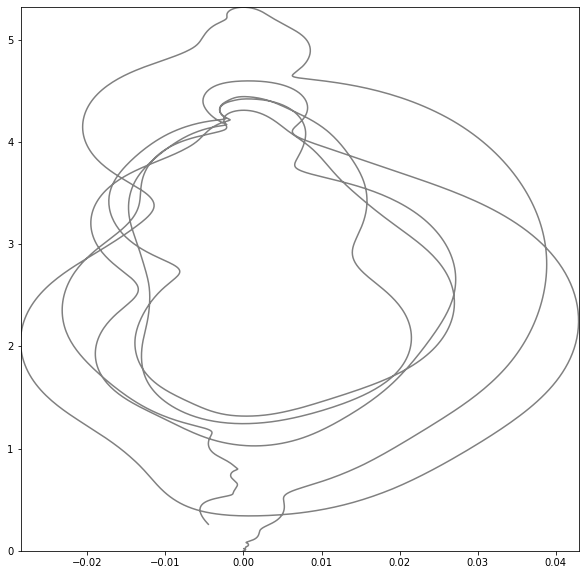

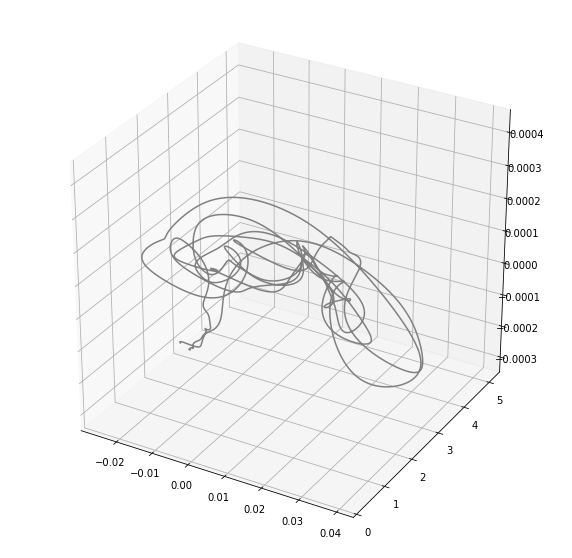

In [199]:
fig = plt.figure
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(v_tgm_sm,tgm_sm,'gray')
plt.xlim(min(v_tgm_sm), max(v_tgm_sm))
plt.ylim(min(tgm_sm), max(tgm_sm))
plt.gca().set_adjustable('box')
plt.draw()

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(v_tgm_sm, tgm_sm, a_tgm_sm, 'gray')
ax.set_xlim(min(v_tgm_sm), max(v_tgm_sm))
ax.set_ylim(min(tgm_sm), max(tgm_sm))
ax.set_zlim(min(a_tgm_sm), max(a_tgm_sm))
plt.axis([min(v_tgm_sm), max(v_tgm_sm), min(tgm_sm), max(tgm_sm)])
plt.gca().set_adjustable('box')
plt.draw()


/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]
/usr/local/lib/python3.7/dist-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_safe_repr.py:273: VisibleDeprecationWarning: sctypeNA and typeNA will be removed in v1.18 of numpy
  item = obj[key]


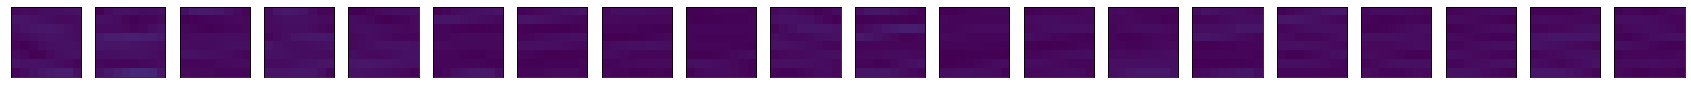

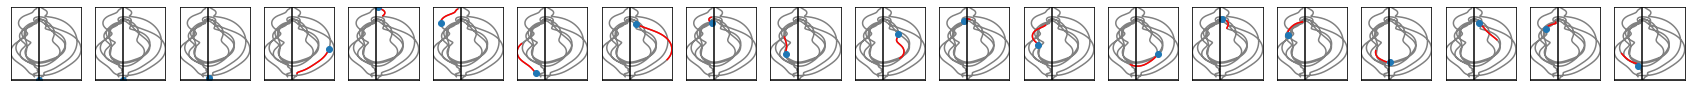

In [177]:
amplitude_envelope_reshaped=amplitude_envelope.reshape(-1,8,8)
# print(amplitude_envelope.shape)
fig, axes = plt.subplots(1,20, )
vmini=np.min(amplitude_envelope_reshaped)
vmaxi=np.max(amplitude_envelope_reshaped)
# print([vmini, vmaxi])
for i,ax in enumerate(axes.flat):
  arr=amplitude_envelope_reshaped[i*200,:,:]
  for j in arange(1,9,9):
    arr=arr+ amplitude_envelope_reshaped[i*200+j,:,:]
  arr /=10
  ax.imshow(arr,vmin=vmini,vmax=vmaxi)
  ax.set_xticks([])
  ax.set_yticks([])


fig, axes = plt.subplots(1,20, figsize=(30,1.35))
for i,ax in enumerate(axes.flat):
  # arr=amplitude_envelope_reshaped[i*200,:,:]
  # for j in [1,2,3,4,5,6,7,8,9]:
  # #   arr=arr+ amplitude_envelope_reshaped[i*200+j,:,:]
  # # arr /=10
  ax.plot(v_tgm_sm,tgm_sm,color='gray')
  ax.plot(v_tgm_sm[i*200:i*200+100],tgm_sm[i*200:i*200+100],color='red')
  ax.plot(v_tgm_sm[i*200+100],tgm_sm[i*200+100],'o')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xlim(min(v_tgm_sm), max(v_tgm_sm))
  ax.set_ylim(min(tgm_sm), max(tgm_sm))
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')




# for i,ax in enumerate(axes.flat):
#     ax.imshow(amplitude_envelope_reshaped[i*200,:,:])


[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63]
 [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
   36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
   72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
  108 110 112 114 116 118 120 122 124 126]]
(2, 8, 8)
[[[  0   1   2   3   4   5   6   7]
  [  8   9  10  11  12  13  14  15]
  [ 16  17  18  19  20  21  22  23]
  [ 24  25  26  27  28  29  30  31]
  [ 32  33  34  35  36  37  38  39]
  [ 40  41  42  43  44  45  46  47]
  [ 48  49  50  51  52  53  54  55]
  [ 56  57  58  59  60  61  62  63]]

 [[  0   2   4   6   8  10  12  14]
  [ 16  18  20  22  24  26  28  30]
  [ 32  34  36  38  40  42  44  46]
  [ 48  50  52  54  56  58  60  62]
  [ 64  66  68  70  72  7

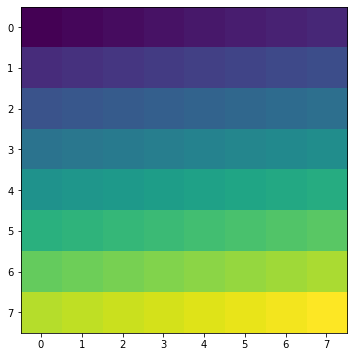

In [10]:
hoba=np.array([np.arange(0,64),
      2*np.arange(0,64)])

print(hoba)
hoba_reshaped=hoba.reshape(-1,8,8)
print(hoba_reshaped.shape)
print(hoba_reshaped)

plt.imshow(hoba_reshaped[0,:,:])

In [ ]:
from PIL import Image, ImageDraw
def make_images(i, hobarey):
    img = Image.fromarray(hobarey[i,:,:].astype('uint8'),'L')
    img= img.resize([160,160])
    return img
def make_gif():
    frames = []

    for i in range(200):
        frames.append(make_images(i,amplitude_envelope_reshaped))
        i += 20
        
    frame_one = frames[0]
    frame_one.save("hoba.gif", format="GIF", append_images=frames,
                   save_all=True, duration=200, loop=0)
    
if __name__ == "__main__":
    make_gif()

In [ ]:
from PIL import Image, ImageDraw
def ellipse(x, y, offset):
    image = Image.new("RGB", (400, 400), "blue")
    draw = ImageDraw.Draw(image)
    draw.ellipse((x, y, x+offset, y+offset), fill="red")
    return image
def make_gif():
    frames = []
    x = 0
    y = 0
    offset = 50
    for number in range(20):
        frames.append(ellipse(x, y, offset))
        x += 35
        y += 35
        
    frame_one = frames[0]
    frame_one.save("circle.gif", format="GIF", append_images=frames,
                   save_all=True, duration=100, loop=0)
    
if __name__ == "__main__":
    make_gif()

In [ ]:
print(len(amplitude_envelope[:,0]))
a=np.repeat(tgm[:,0],len(amplitude_envelope[:,0]),axis=0)


4000


In [ ]:
df = pd.DataFrame(data,columns=['A','B','C'])

corrMatrix = df.corr()
print (corrMatrix)

In [ ]:
import imageio
tr_reshaped=tr.reshape(-1,8,8)
type(tr_reshaped)
# tr_reshaped_transposed=tr_reshaped.transpose()

imageio.mimwrite('/content/output_filename_fps23_time3000_7000ms.gif', np.uint8(tr_reshaped) , fps = 23)

# print(tr_reshaped)

In [ ]:
xxx=[[1,1],
     [1,1]]
yyy=[[2,2],
     [2,2]]

z=np.average(xxx,yyy)

TypeError: ignored

In [ ]:
# from PIL import Image
# canvas = Image.new("RGB",(100,100),"white")
# gif = Image.open('/content/output_filename.gif', 'r')
# frames = []
# try:
#     while 1:
#         frames.append(gif.copy())
#         gif.seek(len(frames))
# except EOFError:
#     pass

# for frame in frames:
#      canvas.paste(frame)
#      canvas.show()


In [ ]:
# # load and show an animated gif file using module pyglet
# # download module pyglet from: http://www.pyglet.org/download.html
# # the animated dinosaur-07.gif file is in the public domain
# # download from http://www.gifanimations.com
# # tested with Python2.5 and pyglet1.1a2  by  vegaseat   22apr2008

# import pyglet

# # pick an animated gif file you have in the working directory
# ag_file = "/content/output_filename.gif"
# animation = pyglet.resource.animation(ag_file)
# sprite = pyglet.sprite.Sprite(animation)

# # create a window and set it to the image size
# win = pyglet.window.Window(width=sprite.width, height=sprite.height)

# # set window background color = r, g, b, alpha
# # each value goes from 0.0 to 1.0
# green = 0, 1, 0, 1
# pyglet.gl.glClearColor(*green)

# @win.event
# def on_draw():
#     win.clear()
#     sprite.draw()

# pyglet.app.run()

In [ ]:
# def animate_cube(cube_array, cut=True, mn=0, sd=0, interval=75, cmap='inferno'):
#     '''
#     animates a python cube for quick visualisation. CANNOT BE SAVED.

#     INPUT:
#         cube_array  : name of 3D numpy array that needs to be animated.
#         cut         : trims pixels off of the images edge to remove edge detector effects.
#                       Default = True as 0 returns empty array.
#         mn          : mean of the cube | Used for contrast
#         sd          : std of the cube  | Used for contrast
#         interval    : #of ms between each frame.
#         cmap        : colormap. Default='hot'

#     OUTPUT:
#         animated window going through the cube.

#     '''

#     fig = plt.figure()
#     std = np.std(cube_array[0])
#     mean = np.mean(cube_array[0])
#     if mn==sd and mn==0:
#         img = plt.imshow(cube_array[0][cut:-cut, cut:-cut], animated=True, vmax=mean+3*std, vmin=mean-3*std, cmap=cmap)
#     else:
#         img = plt.imshow(cube_array[0][cut:-cut, cut:-cut], animated=True, vmax=mn+3*sd, vmin=mn-3*sd, cmap=cmap)

#     def updatefig(i):
#         img.set_array(cube_array[i][cut:-cut, cut:-cut])
#         return img,

#     ani = animation.FuncAnimation(fig, updatefig, frames=cube_array.shape[0], interval=interval, blit=True)
#     plt.colorbar()
#     plt.show()
#     ani.save('/content/cube_movie.avi', writer="ffmpeg", fps=15)

In [ ]:
sampling_rate = 1000.0

time = np.arange(0, 10, 1/sampling_rate)
data = np.sin(2*np.pi*6*time) + np.random.randn(len(time))

time=t
data=trs
fourier_transform = np.fft.rfft(data)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)


mat = scipy.io.loadmat('file.mat')